# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?
### Include #is434 #smu #scis hashtags in your tweet.

In [1]:
import pandas as pd
import plotly.graph_objects as go
from twarc import Twarc2

In [2]:
df = pd.read_csv('Metaverse (Combine).csv')
df.head()

,Column1,Column2,Column3,Column4
0,@nimmchan,RT @DSKULLYS: 🚧 THE 2022 ROADMAP 🚧\n\n☠️ AIRDR...,https://twitter.com/nimmchan/status/1483878300...,"January 20, 2022 at 03:05AM"
1,@RidoHermanto6,RT @YieldYeti: GIVE ME THE YIELD \nGIVE ME THE...,https://twitter.com/RidoHermanto6/status/14838...,"January 20, 2022 at 03:05AM"
2,@fenixbache2310,$BOOB 奶子币\n口号是让全世界的人公平的享用完美的奶子\n这应该是近期能够有现象级的表...,https://twitter.com/fenixbache2310/status/1483...,"January 20, 2022 at 03:05AM"
3,@Mirkado21,RT @SolanaBrains: Quick FAQ:\n\n🧠Supply: 2222\...,https://twitter.com/Mirkado21/status/148387830...,"January 20, 2022 at 03:05AM"
4,@cagatayermis,RT @GenxAnalytics: Heres the TOP🔟 #NFT Project...,https://twitter.com/cagatayermis/status/148387...,"January 20, 2022 at 03:05AM"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  8402 non-null   object
 1   Column2  8402 non-null   object
 2   Column3  8402 non-null   object
 3   Column4  8402 non-null   object
dtypes: object(4)
memory usage: 262.7+ KB


In [5]:
tweet_text_list = df['Column2'].tolist()

tweet_text_list

['RT @DSKULLYS: 🚧 THE 2022 ROADMAP 🚧\n\n☠️ AIRDROPS\n☠️ SKULLY DAO\n☠️ STAKING\n☠️ $SKULLY TOKEN\n☠️ MERCHANDISE\n☠️ METAVERSE\n\nJoin us in our discord! https://t.co/q4sguPeUlG ‼️\n\n#SolanaNFTs #SolanaNFT #NFTCommmunity #NFTLaunch #NFTdrop https://t.co/Feirr3d2UP',
 'RT @YieldYeti: GIVE ME THE YIELD \nGIVE ME THE YETI\nGIVE ME THE YIELD \nGIVE ME THE YETI\nGIVE ME THE YIELD \nGIVE ME THE YETI\nGIVE ME THE YIELD \nGIVE ME THE YETI\nGIVE ME THE YIELD \nGIVE ME THE YETI\n\n🚀🚀🚀\n\n#PlayToEarn \n#Metaverse \n#NFTs \n#Airdrops \n#DeFi \n\n🚀🚀🚀 https://t.co/PqjZwIIJ4E',
 '$BOOB 奶子币\n口号是让全世界的人公平的享用完美的奶子\n这应该是近期能够有现象级的表现的meme了\n有市场有需求 做事团队\n绝对是下一个 $PEOPLE $SOS $GAS\n兄弟们 给我上\nhttps://t.co/s22KDiwMCQ\n刚买了8个 $ETH 目前已经爆拉30个点了\n\n#NFT #Metaverse #Airdrop $ELON $SHIB\nhttps://t.co/n3RTlrhqJD',
 'RT @SolanaBrains: Quick FAQ:\n\n🧠Supply: 2222\n🧠Price: 0.66 SOL\n🧠Mint Date: TBD\n🧠Whitelist: 1000 slots\n🧠Discord: soon.\n\n#SolSeaNFT #SolanaCommunity #SOL #SolanaAirdrop #Solana  #SolNFT #Metaverse #MINT 

In [15]:
import re
import numpy as np

stopwords = ["amp","tag","rt","will","metaverse","for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
res = []
for tweet in tweet_text_list:
    if type(tweet) == np.float:
        continue;
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    res.append(temp)

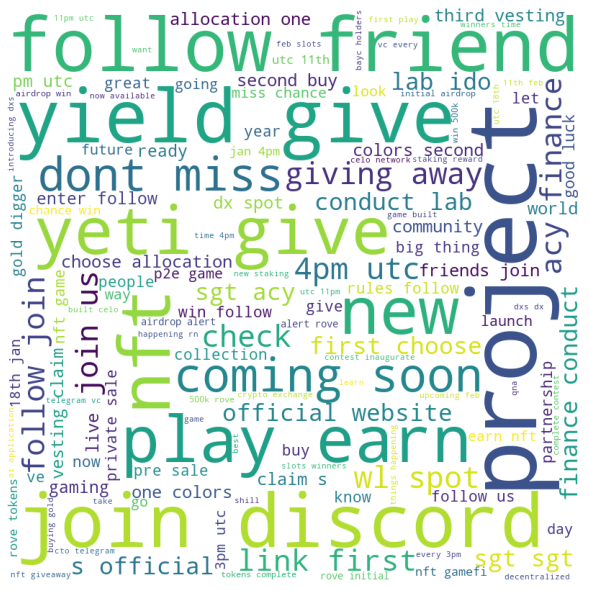

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in res:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()